In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path="C:\\Users\\abhin\\Downloads\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
visa_df.shape

(25480, 12)

In [4]:
visa_df.size

305760

In [5]:
visa_df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [6]:
visa_df.values

array([['EZYV01', 'Asia', 'High School', ..., 'Hour', 'Y', 'Denied'],
       ['EZYV02', 'Asia', "Master's", ..., 'Year', 'Y', 'Certified'],
       ['EZYV03', 'Asia', "Bachelor's", ..., 'Year', 'Y', 'Denied'],
       ...,
       ['EZYV25478', 'Asia', "Master's", ..., 'Year', 'N', 'Certified'],
       ['EZYV25479', 'Asia', "Master's", ..., 'Year', 'Y', 'Certified'],
       ['EZYV25480', 'Asia', "Bachelor's", ..., 'Year', 'Y', 'Certified']],
      dtype=object)

In [7]:
visa_df.drop('case_id',axis=1,inplace=True)

In [8]:
# separate categorical and numarical
num=visa_df.select_dtypes(include=['number']).columns
cat=visa_df.select_dtypes(include=['object','category']).columns
print('cat:',cat)
print('num:',num)

cat: Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')
num: Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


In [9]:
visa_df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
visa_df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Categorical Analysis**

In [11]:
cat

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [12]:
for i in cat:
    a=visa_df[i].unique()
    print(i,a)

continent ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience ['N' 'Y']
requires_job_training ['N' 'Y']
region_of_employment ['West' 'Northeast' 'South' 'Midwest' 'Island']
unit_of_wage ['Hour' 'Year' 'Week' 'Month']
full_time_position ['Y' 'N']
case_status ['Denied' 'Certified']


**Bar Graph**

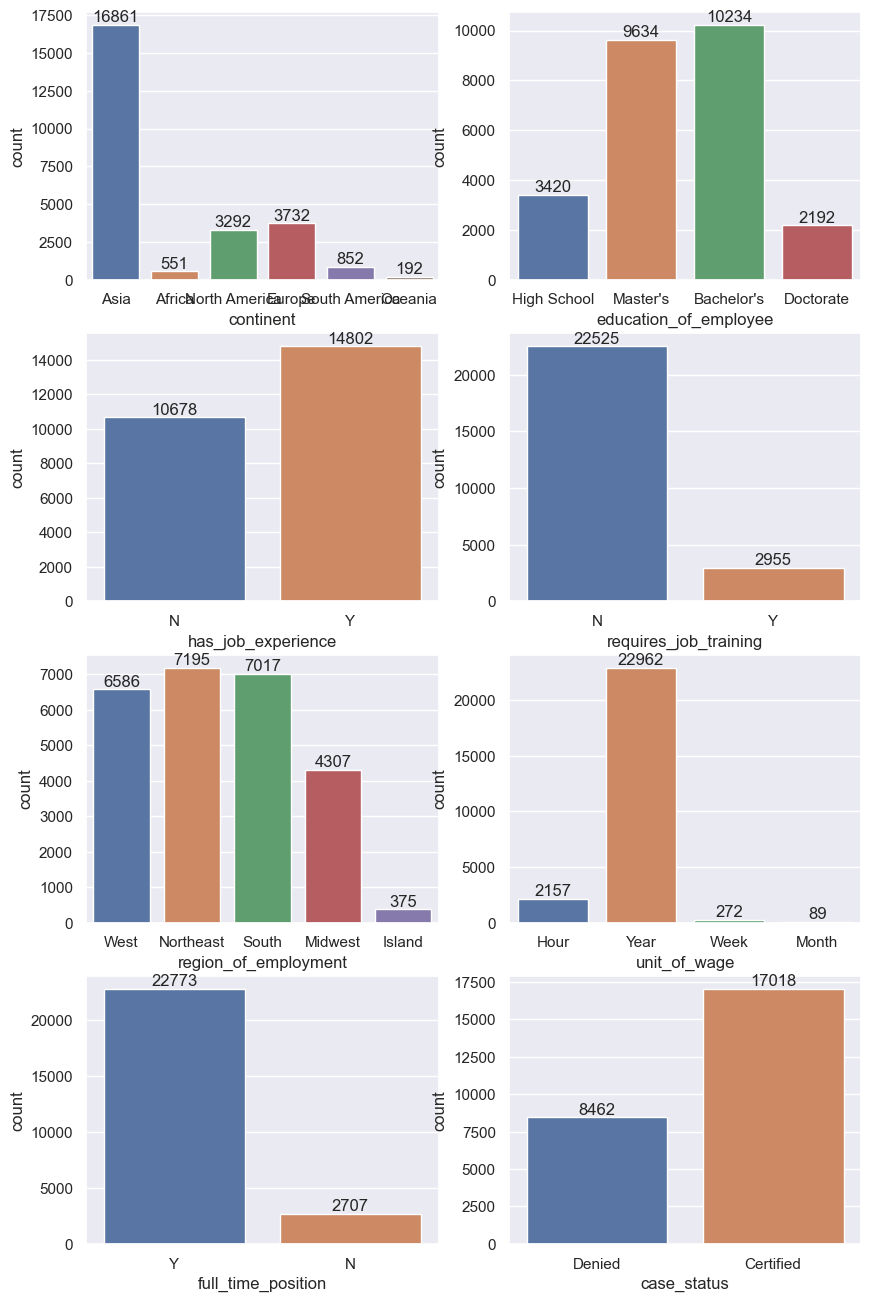

In [13]:
plt.figure(figsize=(10,16))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)
    
    ax=sns.countplot(data=visa_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()    

**Pie chart**

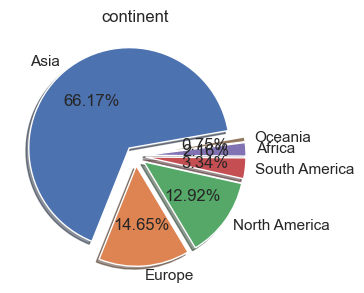

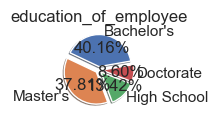

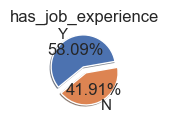

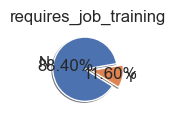

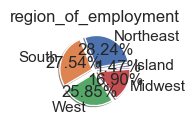

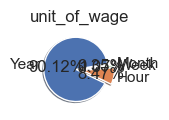

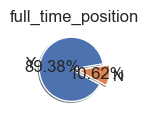

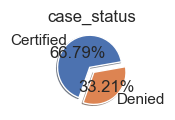

In [14]:
plt.figure(figsize=(20,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)
    visa_df[column].value_counts()
    Property=visa_df[column].value_counts(normalize=True).keys()
    count=visa_df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'count'])
    n=visa_df[column].nunique()
    l=[0.1 for i in range(n) ]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=10,explode=l)
    plt.show()

**Bar chart and pie chart**

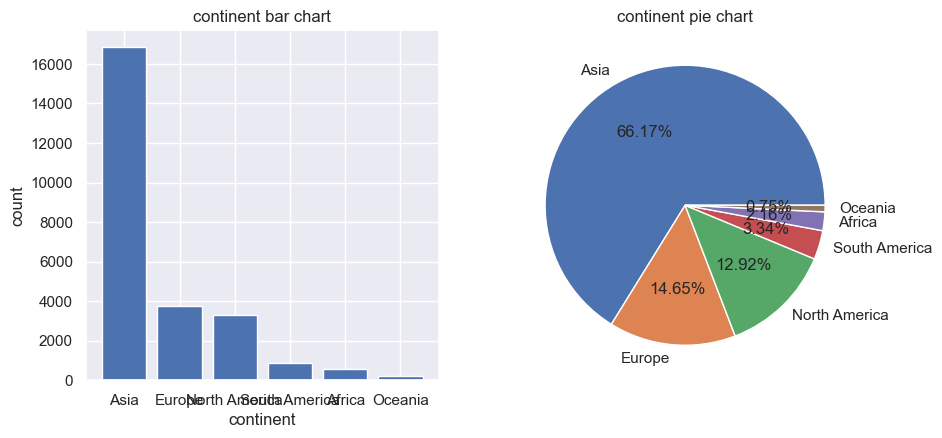

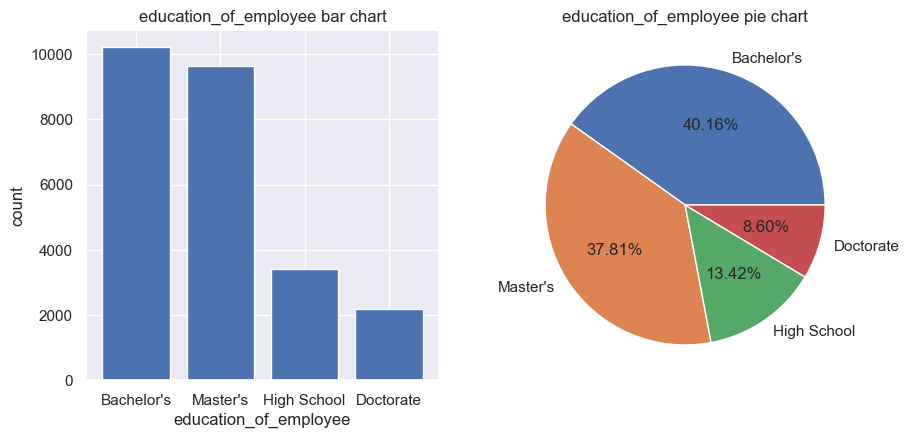

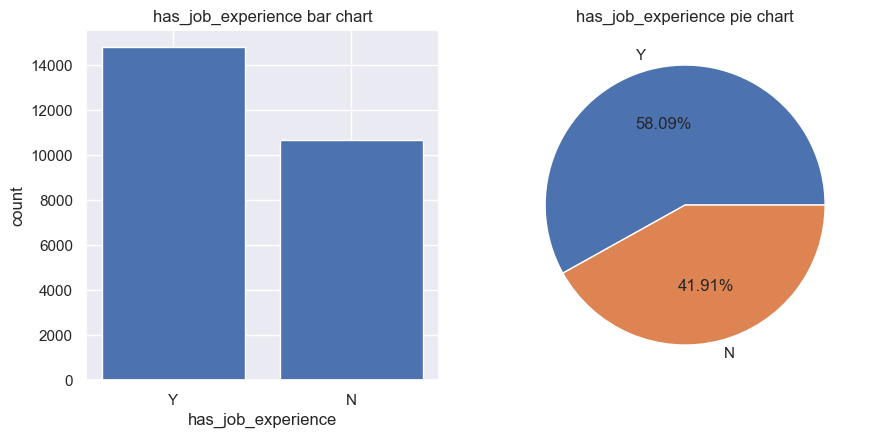

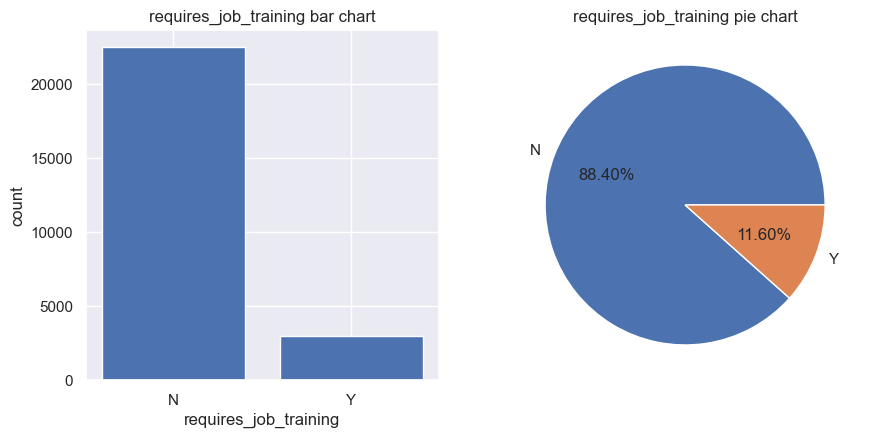

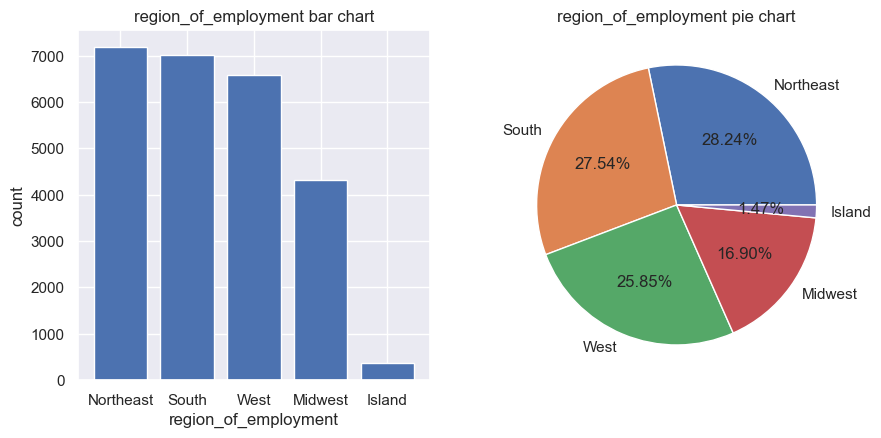

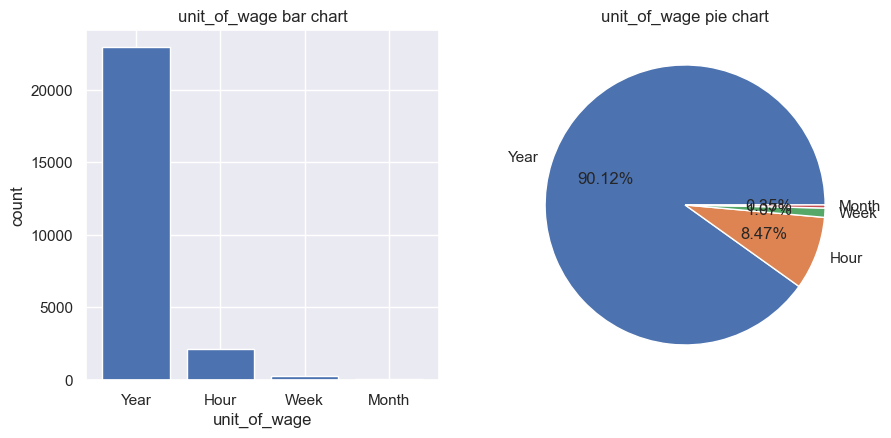

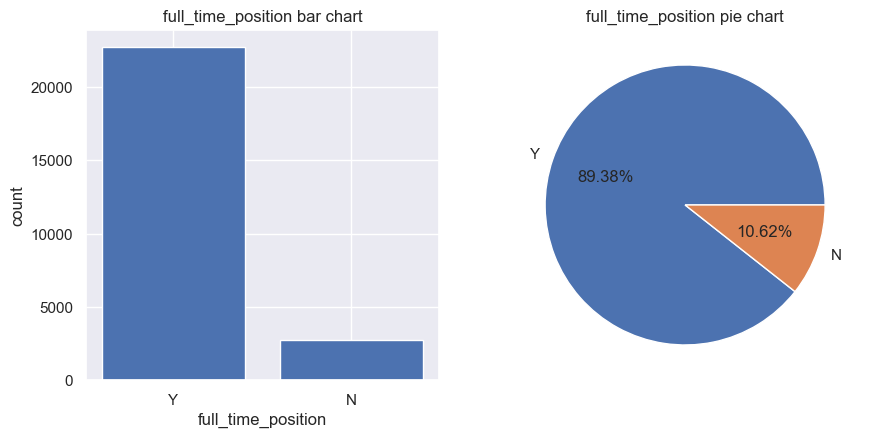

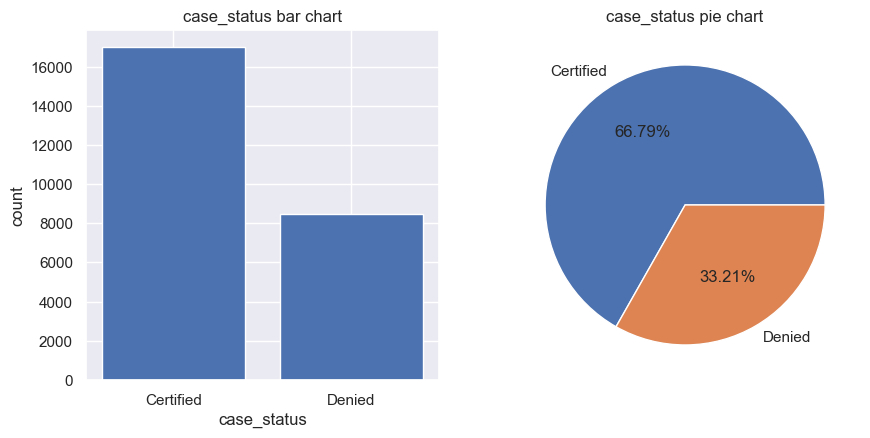

In [15]:
for column in cat:
    visa_df[column].value_counts()
    Property=visa_df[column].value_counts().keys()
    count=visa_df[column].value_counts().values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'count'])
    Data
    
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title(f'{column} bar chart')
    plt.bar(column,'count',data=Data)
    
    plt.xlabel(column)
    plt.ylabel('count')
    
    plt.subplot(2,2,2)
    plt.title(f'{column} pie chart')
    plt.pie(x=count,labels=Property,autopct='%0.2f%%') 
    plt.show()

**Numarical Data Analysis**

In [16]:
for i in num:
    d_count=round(visa_df[i].count(),2)
    d_max=round(visa_df[i].max(),2)
    d_min=round(visa_df[i].min(),2)
    d_mean=round(visa_df[i].mean())
    d_median=round(visa_df[i].median(),2)
    d_std=round(visa_df[i].std(),2)
    
    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('---------------------')

no_of_employees count: 25480
no_of_employees max: 602069
no_of_employees min: -26
no_of_employees mean: 5667
no_of_employees median: 2109.0
no_of_employees std: 22877.93
---------------------
yr_of_estab count: 25480
yr_of_estab max: 2016
yr_of_estab min: 1800
yr_of_estab mean: 1979
yr_of_estab median: 1997.0
yr_of_estab std: 42.37
---------------------
prevailing_wage count: 25480
prevailing_wage max: 319210.27
prevailing_wage min: 2.14
prevailing_wage mean: 74456
prevailing_wage median: 70308.21
prevailing_wage std: 52815.94
---------------------


In [17]:
for i in num:
    q1=np.quantile(visa_df[i],0.25)
    q2=np.quantile(visa_df[i],0.50)
    q3=np.quantile(visa_df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',q3)
    print('___________')

no_of_employees q1: 1022.0
no_of_employees q2: 2109.0
no_of_employees q3: 3504.0
___________
yr_of_estab q1: 1976.0
yr_of_estab q2: 1997.0
yr_of_estab q3: 2005.0
___________
prevailing_wage q1: 34015.479999999996
prevailing_wage q2: 70308.20999999999
prevailing_wage q3: 107735.51250000001
___________


In [18]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

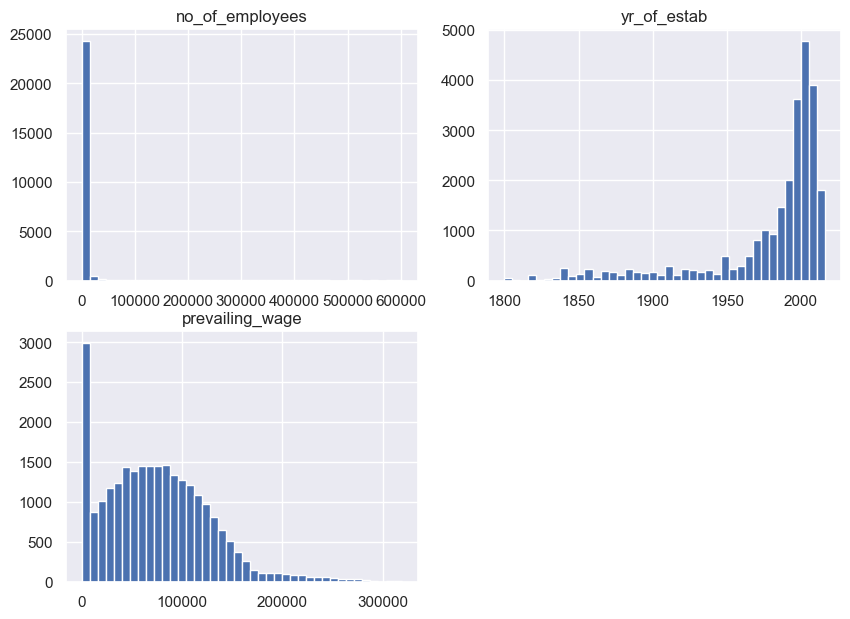

In [19]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(visa_df[column],bins=40)
plt.show()

$Empirical$ $Rule$

In [20]:
# check Normality 
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [21]:
mean=visa_df['no_of_employees'].mean()
std=visa_df['no_of_employees'].std()

In [22]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=visa_df['no_of_employees']>val_minus_1
con2=visa_df['no_of_employees']<val_plus_1

ep1=len(visa_df[con1&con2])
ep2=ep1/len(visa_df)

con3=visa_df['no_of_employees']>val_minus_2
con4=visa_df['no_of_employees']<val_plus_2

ep3=len(visa_df[con3&con4])
ep4=ep3/len(visa_df)

con5=visa_df['no_of_employees']>val_minus_3
con6=visa_df['no_of_employees']<val_plus_3
ep5=len(visa_df[con3&con4])
ep6=ep5/len(visa_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.9683673469387755
ep2: 0.9778257456828885
ep3: 0.9778257456828885


In [23]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=visa_df['yr_of_estab']>val_minus_1
con2=visa_df['yr_of_estab']<val_plus_1

ep1=len(visa_df[con1&con2])
ep2=ep1/len(visa_df)

con3=visa_df['yr_of_estab']>val_minus_2
con4=visa_df['yr_of_estab']<val_plus_2

ep3=len(visa_df[con3&con4])
ep4=ep3/len(visa_df)

con5=visa_df['yr_of_estab']>val_minus_3
con6=visa_df['yr_of_estab']<val_plus_3
ep5=len(visa_df[con3&con4])
ep6=ep5/len(visa_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [24]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=visa_df['prevailing_wage']>val_minus_1
con2=visa_df['prevailing_wage']<val_plus_1

ep1=len(visa_df[con1&con2])
ep2=ep1/len(visa_df)

con3=visa_df['prevailing_wage']>val_minus_2
con4=visa_df['prevailing_wage']<val_plus_2

ep3=len(visa_df[con3&con4])
ep4=ep3/len(visa_df)

con5=visa_df['prevailing_wage']>val_minus_3
con6=visa_df['prevailing_wage']<val_plus_3
ep5=len(visa_df[con3&con4])
ep6=ep5/len(visa_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.2164050235478807
ep2: 0.3661302982731554
ep3: 0.3661302982731554


In [25]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

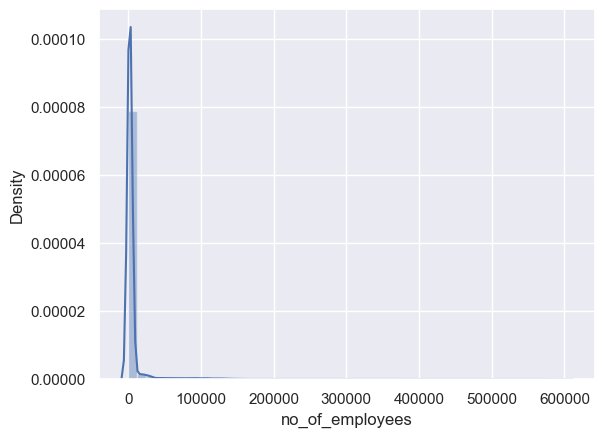

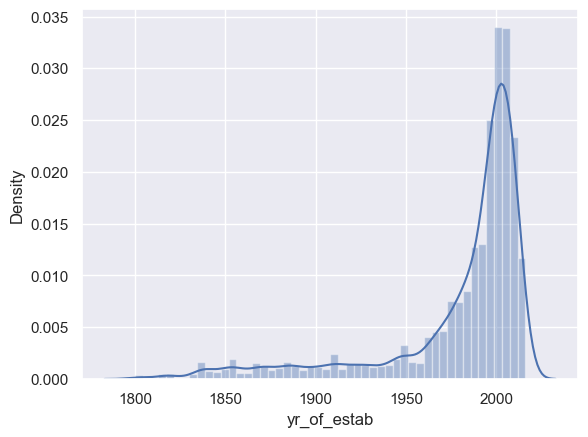

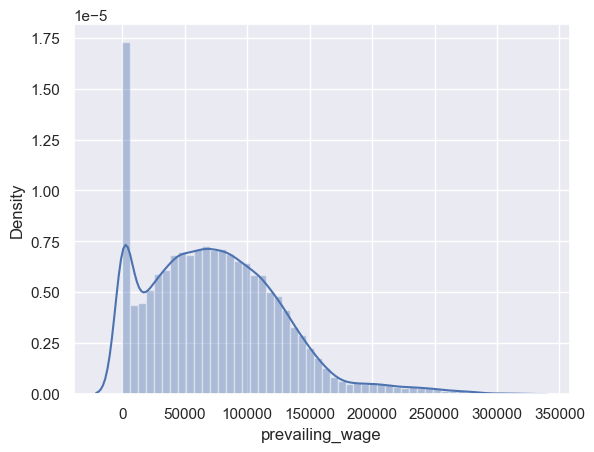

In [26]:
for i in num:
    sns.distplot(visa_df[i])
    plt.show()

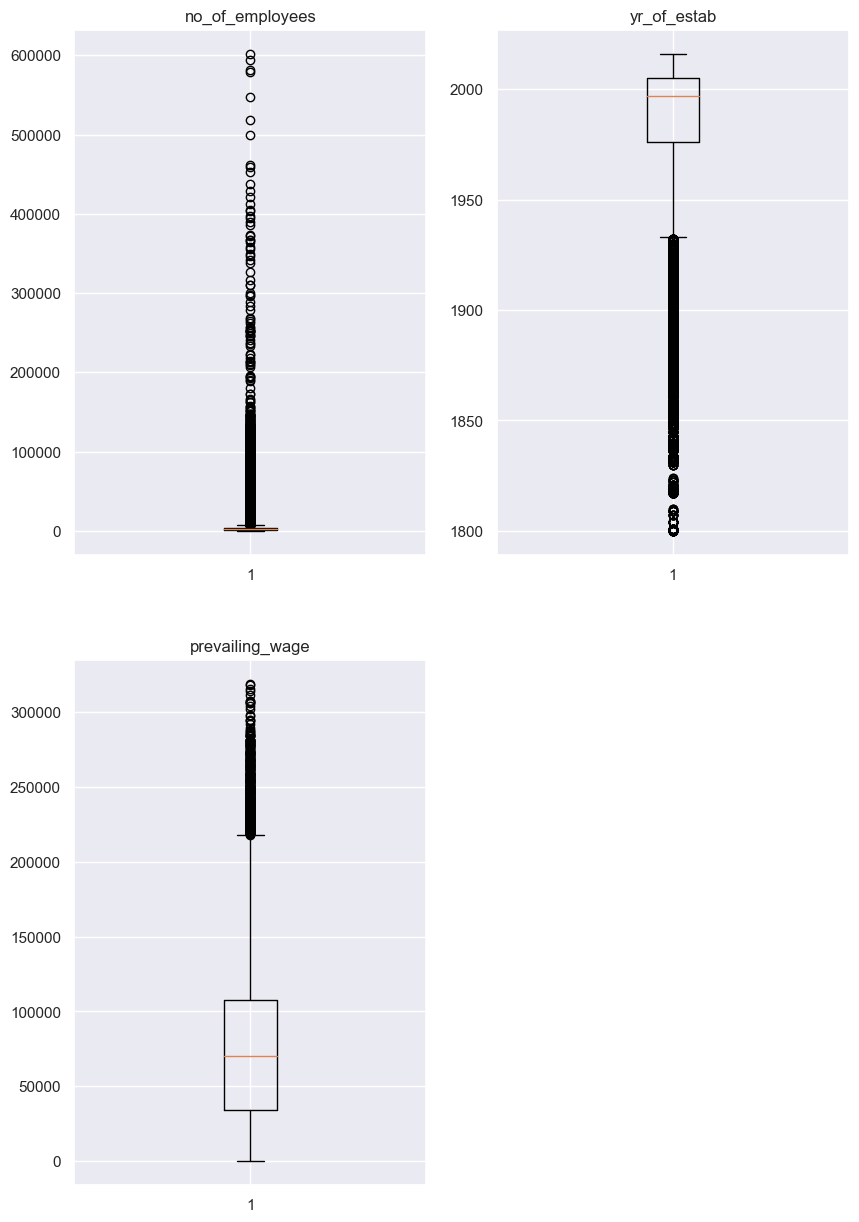

In [27]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(2,2,i+1)
    plt.title(column)
    plt.boxplot(visa_df[column])
plt.show()    

In [28]:
num #  CHECK OUTLIERS

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [29]:
q1=np.quantile(visa_df['no_of_employees'],0.25)
q2=np.quantile(visa_df['no_of_employees'],0.50)
q3=np.quantile(visa_df['no_of_employees'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=visa_df['no_of_employees']>ub1
con2=visa_df['no_of_employees']<lb1
outlier=visa_df[con1|con2]
len(outlier)

1556

In [30]:
q1=np.quantile(visa_df['no_of_employees'],0.25)
q2=np.quantile(visa_df['no_of_employees'],0.50)
q3=np.quantile(visa_df['no_of_employees'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=visa_df['no_of_employees']<ub1
con2=visa_df['no_of_employees']>lb1
non_outlier=visa_df[con1&con2]
len(non_outlier)

23924

In [31]:
# percentile of outliers
v=(len(outlier)/len(visa_df))*100
v

6.106750392464678

In [32]:
# yr_of_estab
q1=np.quantile(visa_df['yr_of_estab'],0.25)
q2=np.quantile(visa_df['yr_of_estab'],0.50)
q3=np.quantile(visa_df['yr_of_estab'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=visa_df['yr_of_estab']>ub2
con2=visa_df['yr_of_estab']<lb2
outlier1=visa_df[con1|con2]
len(outlier1)

3260

In [33]:
q1=np.quantile(visa_df['yr_of_estab'],0.25)
q2=np.quantile(visa_df['yr_of_estab'],0.50)
q3=np.quantile(visa_df['yr_of_estab'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=visa_df['yr_of_estab']<ub2
con2=visa_df['yr_of_estab']>lb2
non_outlier1=visa_df[con1&con2]
len(non_outlier1)

22220

In [34]:
v1=(len(outlier1)/len(visa_df))*100
v1

12.794348508634224

In [35]:
# prevailing_wage
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=visa_df['prevailing_wage']>ub3
con2=visa_df['prevailing_wage']<lb3
outlier2=visa_df[con1|con2]
len(outlier2)

427

In [36]:
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=visa_df['prevailing_wage']<ub3
con2=visa_df['prevailing_wage']>lb3
non_outlier2=visa_df[con1&con2]
len(non_outlier2)

25053

In [37]:
v2=(len(outlier2)/len(visa_df))*100
v2

1.6758241758241759

In [38]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [39]:
visa_df['no_of_employees']=np.clip(visa_df['no_of_employees'],lb1,ub1)

In [40]:
len(visa_df['no_of_employees'])

25480

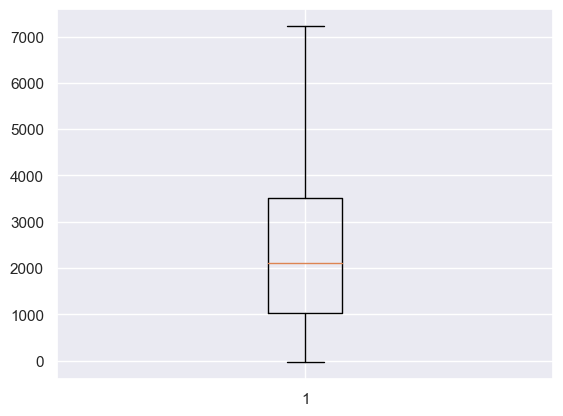

In [41]:
plt.boxplot(visa_df['no_of_employees'])
plt.show()

In [42]:
visa_df['yr_of_estab']=np.clip(visa_df['yr_of_estab'],lb2,ub2)


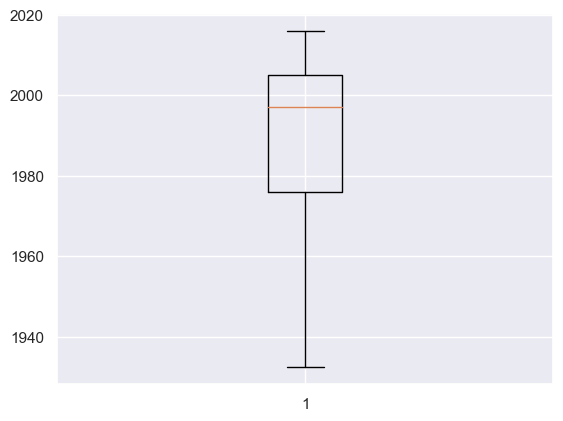

In [43]:
plt.boxplot(visa_df['yr_of_estab'])
plt.show()

In [44]:
visa_df['prevailing_wage']=np.clip(visa_df['prevailing_wage'],lb3,ub3)

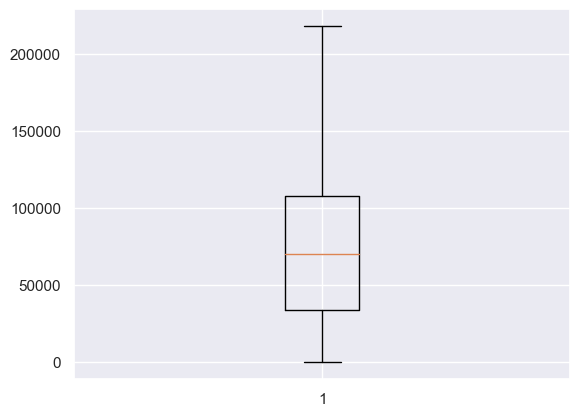

In [45]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

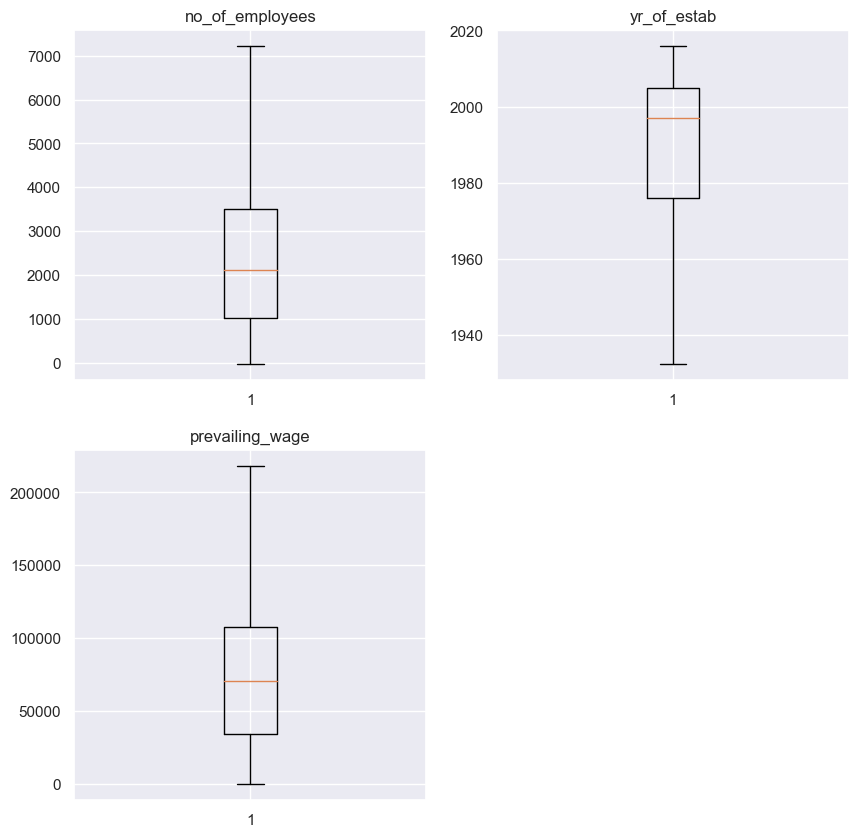

In [46]:
plt.figure(figsize=(10,10))
for i, column in enumerate(num):
    plt.subplot(2,2,i+1)
    plt.title(column)
    plt.boxplot(visa_df[column])
plt.show()    

**Bivariate Analysis**

In [47]:
cat

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

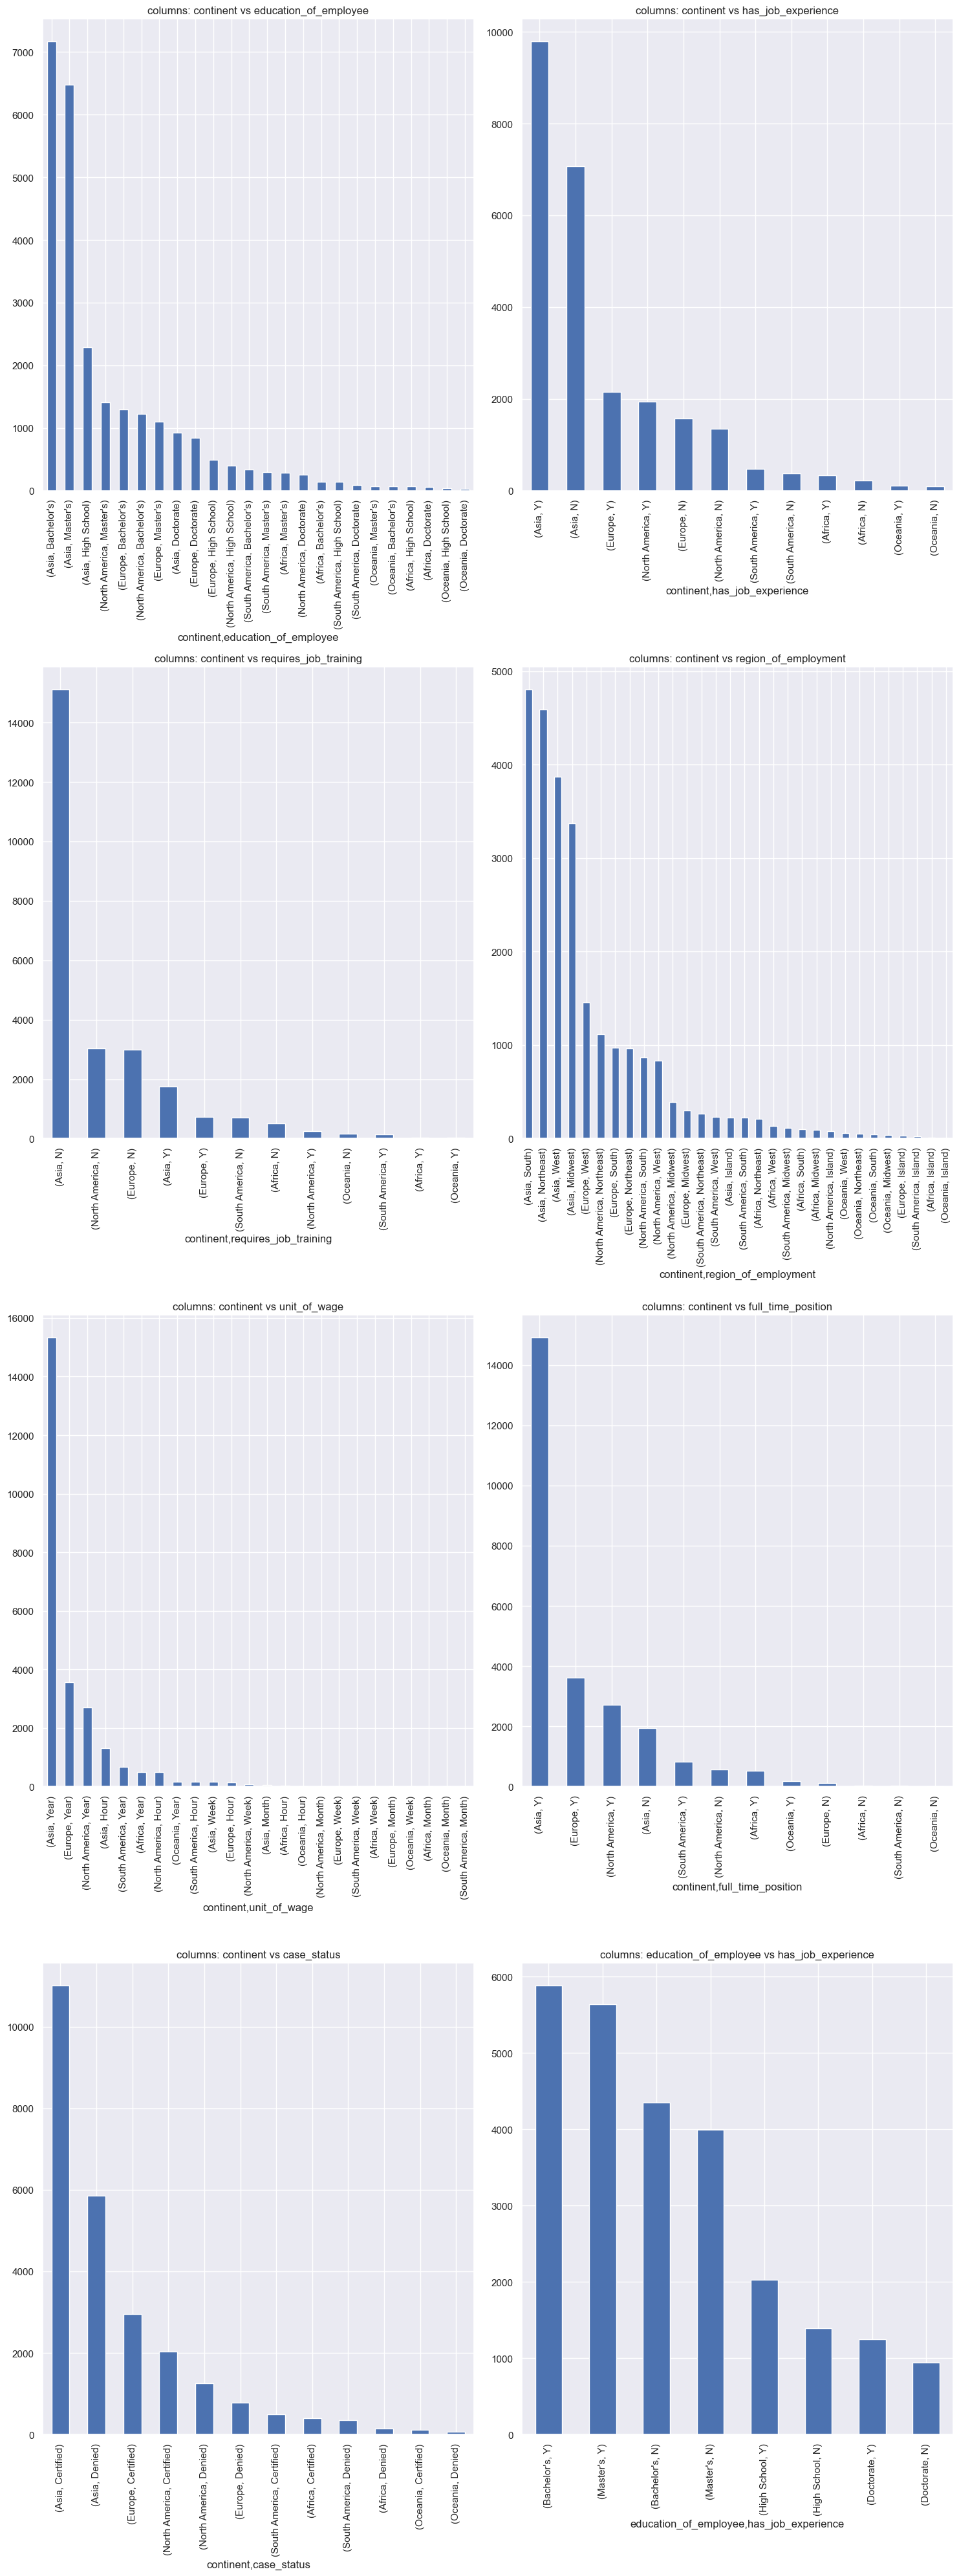

In [48]:
import matplotlib.pyplot as plt
total_plots = 4*2

fig,axes = plt.subplots(4,2, figsize=(15,40))

plot_counter = 0

for i in cat:
    for j in cat[1:]:
        if i != j and plot_counter < total_plots:
            ax= axes[plot_counter // 2, plot_counter % 2]
            visa_df[[i,j]].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'columns: {i} vs {j}')
            plot_counter += 1
                         
plt.tight_layout()
plt.show()          

**Multivariate**

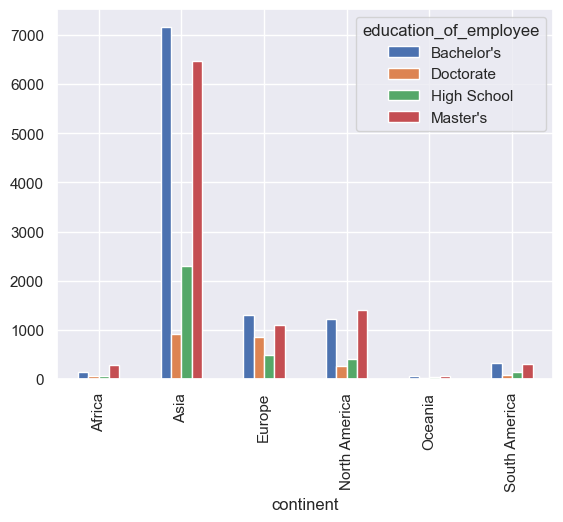

In [49]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['has_job_experience']
col=[col1,col3]
result=pd.crosstab(col1,col2)

result.plot(kind='bar')
plt.show()

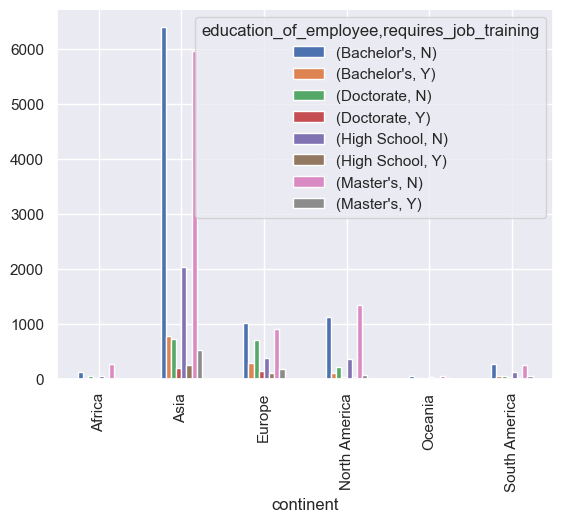

In [50]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['requires_job_training']
col=[col2,col3]
result=pd.crosstab(col1,col)

result.plot(kind='bar')
plt.show()

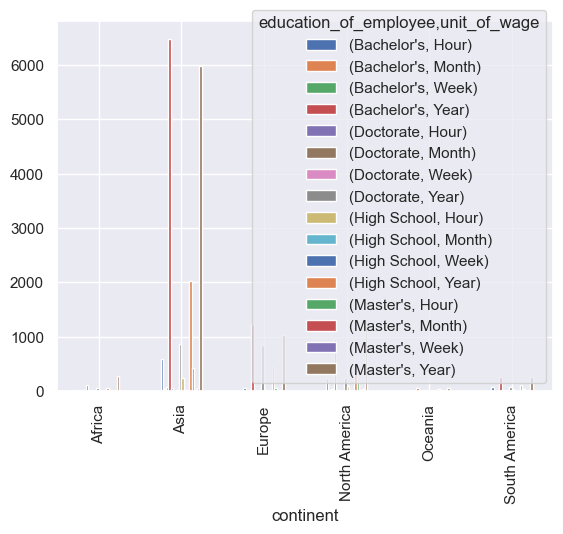

In [51]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['unit_of_wage']
col=[col2,col3]
result=pd.crosstab(col1,col)

result.plot(kind='bar')
plt.show()

**Numerical VS Numerical**

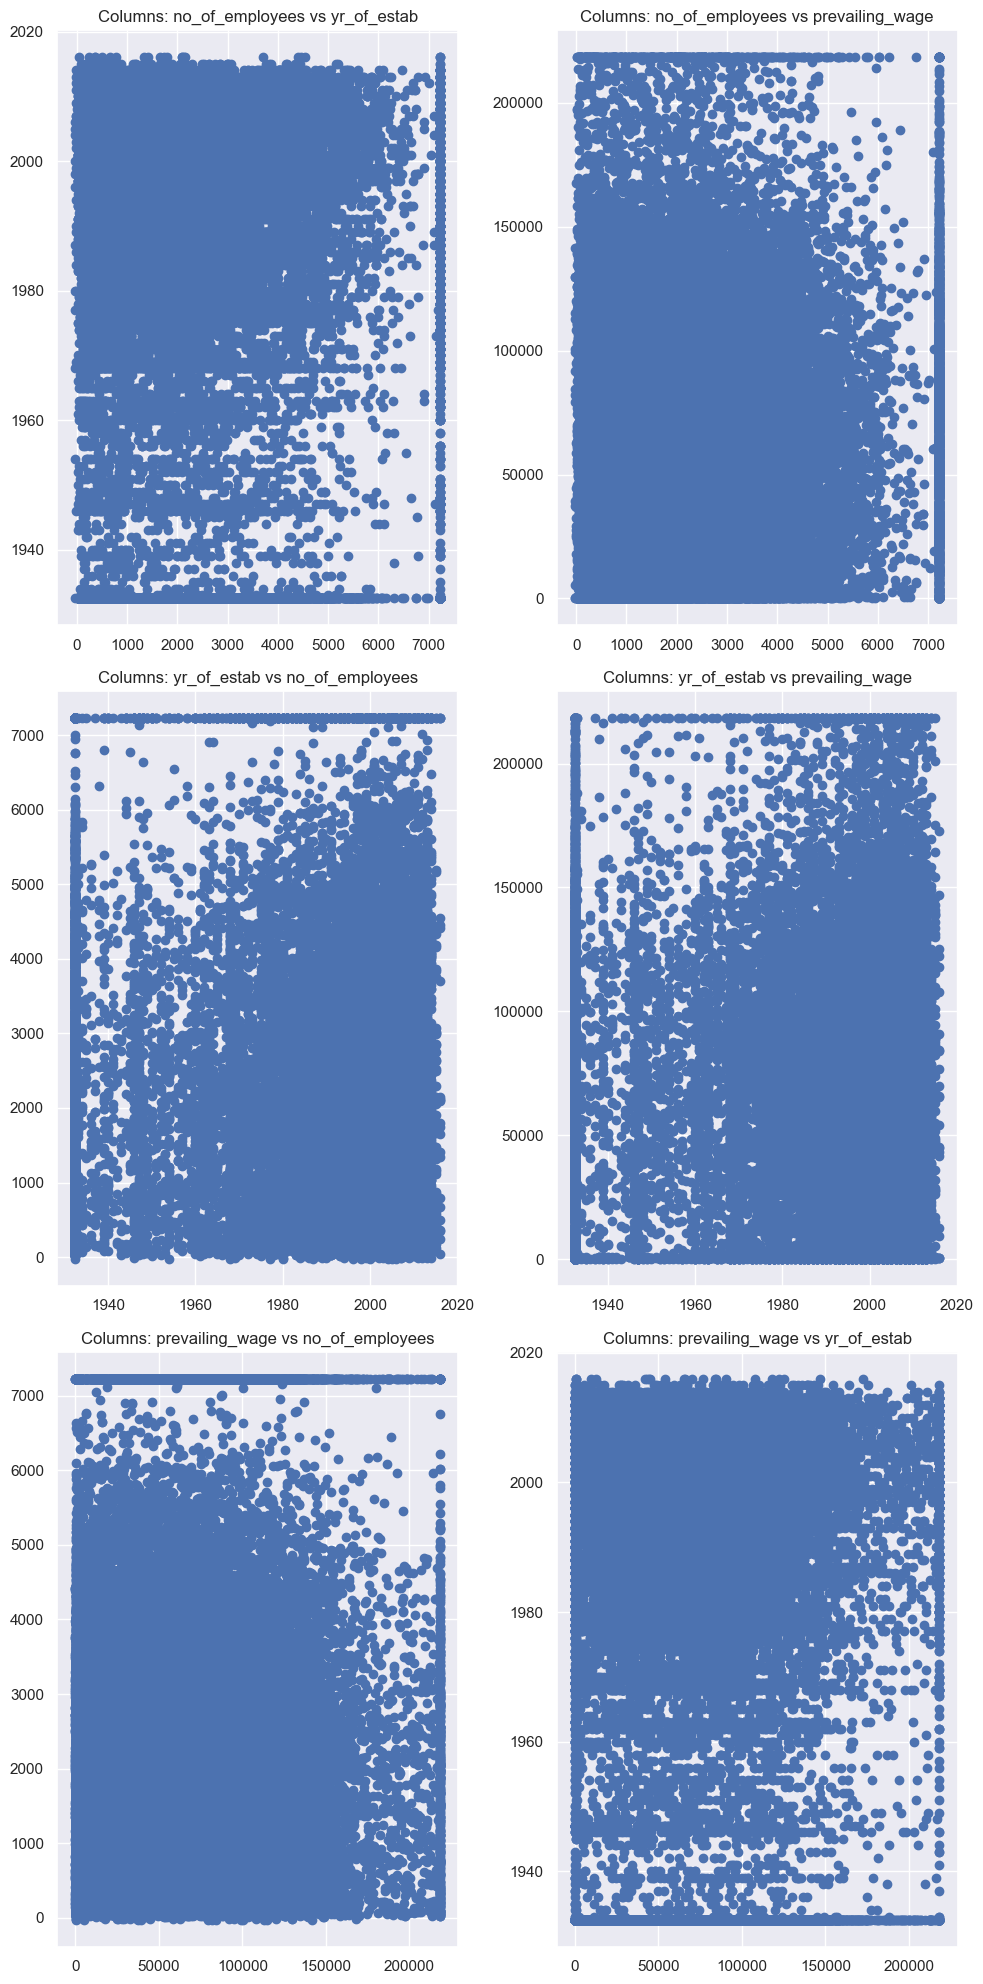

In [52]:
import matplotlib.pyplot as plt

total_plots = 3 * 2

fig, axes = plt.subplots(3,2, figsize=(10,20))

plot_counter = 0

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:
            ax =axes[plot_counter // 2, plot_counter % 2]
            ax.scatter(visa_df[i],visa_df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1
            
plt.tight_layout()
plt.show()

**Correlation**

In [53]:
corr=visa_df.corr(numeric_only=True)
corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.005409,-0.018365
yr_of_estab,-0.005409,1.000000,0.016122
prevailing_wage,-0.018365,0.016122,1.000000


**Heatmap**

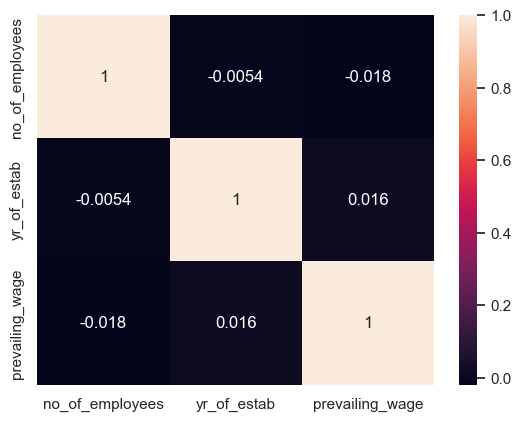

In [54]:
sns.heatmap(corr,annot=True)
plt.show()

**Check the skew**

In [55]:
for i in (num):
    print(i,visa_df[i].skew())

no_of_employees 0.9586263910941347
yr_of_estab -1.1110177111843542
prevailing_wage 0.546740685190096


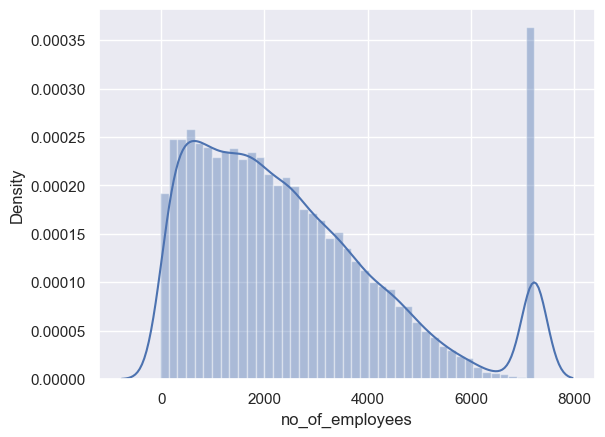

In [56]:
sns.distplot(visa_df['no_of_employees'])
plt.show()

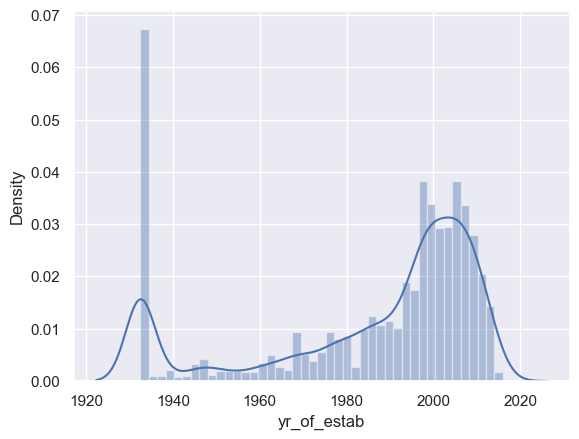

In [57]:
sns.distplot(visa_df['yr_of_estab'])
plt.show()

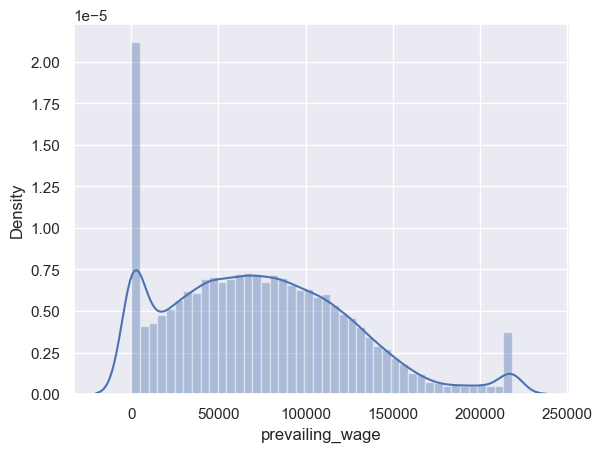

In [58]:
sns.distplot(visa_df['prevailing_wage'])
plt.show()

**Convert Categorical Into Numerical**

In [59]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    visa_df[i]=le.fit_transform(visa_df[i])

In [60]:
visa_df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,7227,2007.0,4,592.20290,0,1,1
1,1,3,1,0,2412,2002.0,2,83425.65000,3,1,0
2,1,0,0,1,7227,2008.0,4,122996.86000,3,1,1
3,1,0,0,0,98,1932.5,4,83434.03000,3,1,1
4,0,3,1,0,1082,2005.0,3,149907.39000,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25475,1,0,1,1,2601,2008.0,3,77092.57000,3,1,0
25476,1,2,1,0,3274,2006.0,2,218315.56125,3,1,0
25477,1,3,1,0,1121,1932.5,3,146298.85000,3,0,0
25478,1,3,1,1,1918,1932.5,4,86154.77000,3,1,0


**Machine Learning**

In [61]:
X=visa_df.drop('case_status',axis=1)

y=visa_df['case_status']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [64]:
print(visa_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25480, 11)
(20384, 10)
(5096, 10)
(20384,)
(5096,)


**Decision Tree**

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction**

In [66]:
y_pred_dt=dtree.predict(X_test)

**Metrices**

In [68]:
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [70]:
print("accuracy is:",acc_dt)
print("F1 is:",f1_dt)
print("precision is:",precision_dt)
print("recall is :",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuracy is: 66
F1 is: 0.49
precision is: 0.47
recall is : 0.5
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      3454
           1       0.47      0.50      0.49      1642

    accuracy                           0.66      5096
   macro avg       0.61      0.62      0.62      5096
weighted avg       0.66      0.66      0.66      5096



**Confusion Matrices**

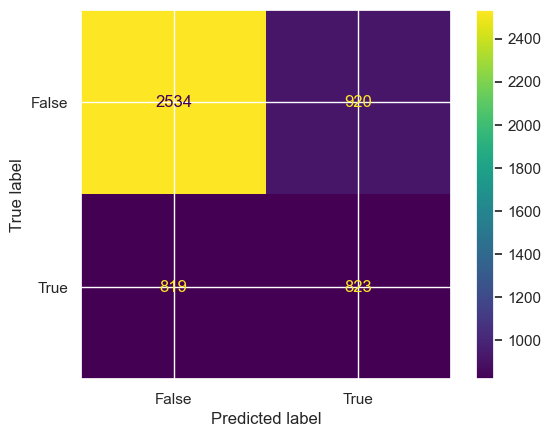

In [71]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels =  [False,True])

disp.plot()
plt.grid(True)
plt.show()

In [72]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 2534
False postive: 920
False negative: 819
True postive: 823


**ROC-AUC Curve**

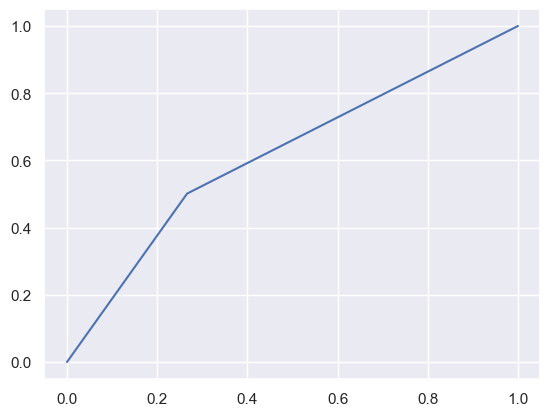

In [73]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Logistic Regression**

In [74]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train,y_train)

LogisticRegression()

**Prediction**

In [75]:
y_pred_log=logtree.predict(X_test)

**Metrices**

In [76]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 67.78
F1 is: 0.0
Precision is: 0.0
Recall is: 0.0


**Confusion Metrices**

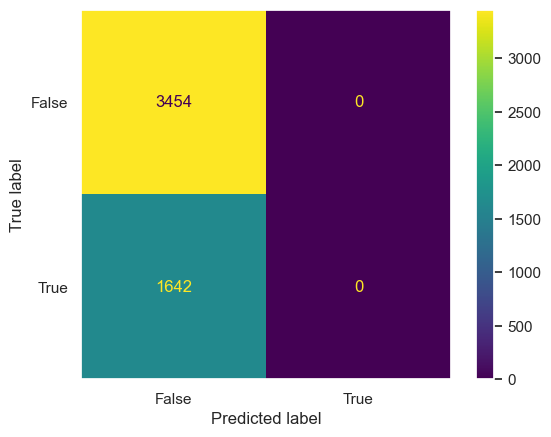

In [77]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [78]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 3454
False postive: 0
False negative: 1642
True postive: 0


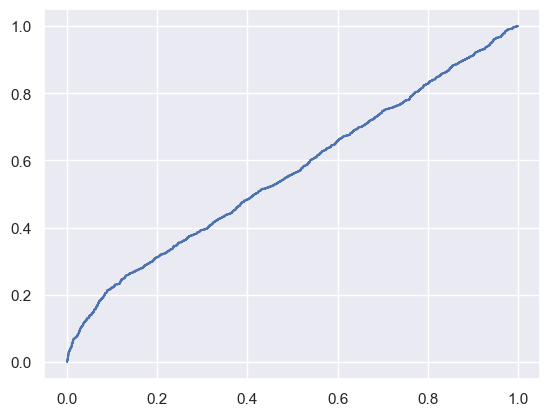

In [79]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Naive Bayes**

In [81]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [82]:
y_pred_NB=NBtree.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 70.23
F1 is: 0.2
Precision is: 0.75
Recall is: 0.11


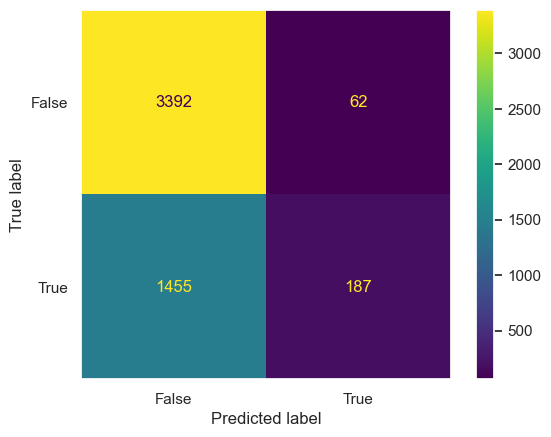

In [84]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [85]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 3392
False postive: 62
False negative: 1455
True postive: 187


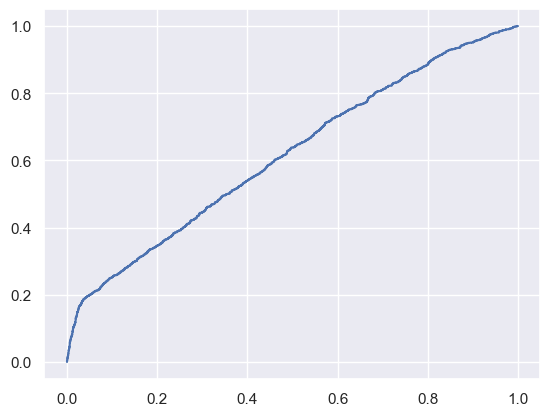

In [86]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred_KNN=KNNtree.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 63.36
F1 is: 0.33
Precision is: 0.4
Recall is: 0.28


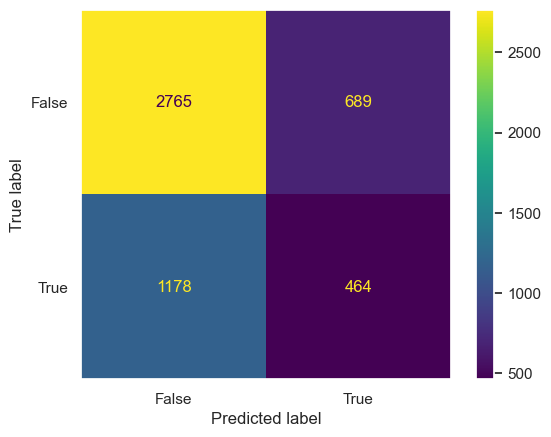

In [90]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [91]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 2765
False postive: 689
False negative: 1178
True postive: 464


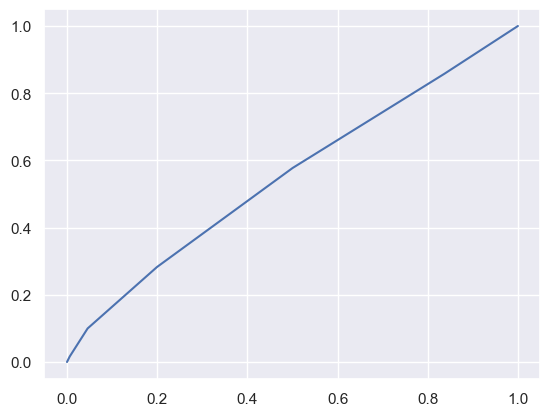

In [92]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Random Forest**

In [93]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train,y_train)

RandomForestClassifier()

In [94]:
y_pred_RF=RFtree.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 73.23
F1 is: 0.55
Precision is: 0.6
Recall is: 0.5


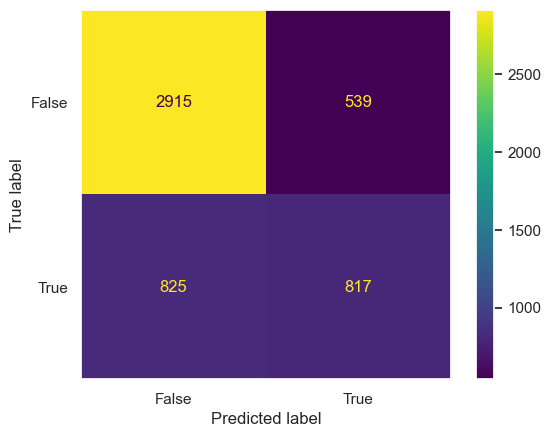

In [96]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])

disp.plot()
plt.grid(False)
plt.show()

In [97]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 2915
False postive: 539
False negative: 825
True postive: 817


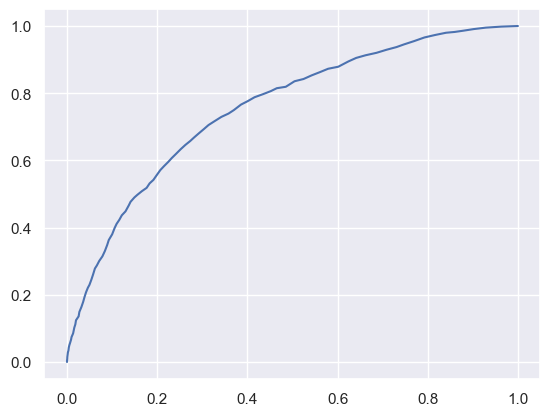

In [98]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Gradient Boosting**

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [108]:
y_pred_GB=GB.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GB= round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)


accuray is: 75.59
F1 is: 0.57
Precision is: 0.66
Recall is: 0.5


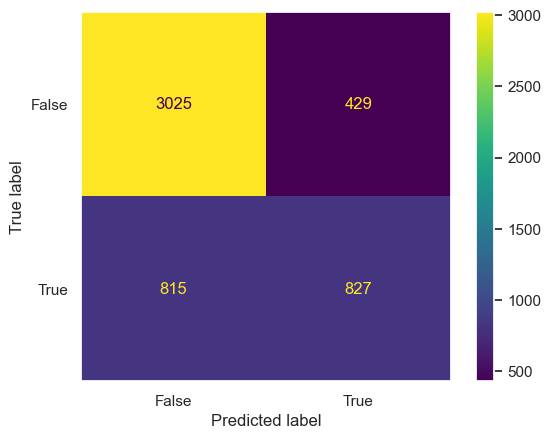

In [110]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_GB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [111]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 3025
False postive: 429
False negative: 815
True postive: 827


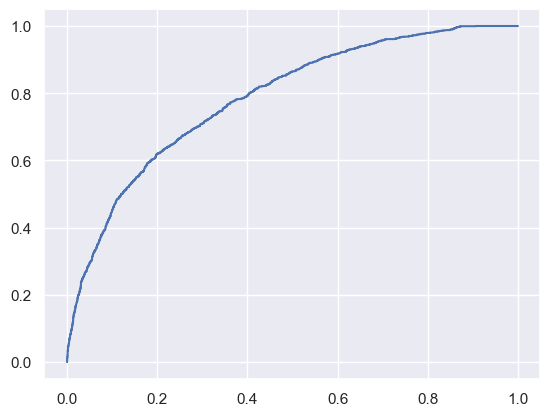

In [112]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_GB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

**Comparing Which Model is best**

In [113]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
DT,66.00,0.47,0.50,0.49
KNN,63.36,0.40,0.28,0.33
Logistic,67.78,0.00,0.00,0.00
Naive Bayes,70.23,0.75,0.11,0.20
Random Forest,73.23,0.60,0.50,0.55
Gradient Boosting,75.59,0.66,0.50,0.57
